In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import numpy.random as rnd
import random
import seaborn as sns
sns.set()

# Task 1

##### Load wordcounts dataset.

In [2]:
text_file = open("wordcounts.txt", "r")
lines = text_file.read().split('\n')

##### Check that Zipf's Law holds

We are interested only in values, so we take only them

In [3]:
values = []
for line in lines:
    if len(line.split()) > 0:
        values.append(int(line.split()[0]))
values.sort(reverse=True)

Zipf's law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So word number N has a frequency of N.

Thus the most frequent word will occur about twice as often as the second most frequent word, three times as often as the third most frequent word, etc.

In [4]:
empiric_prob = []
law_prob = []
for i in range(len(values)):
    empiric_prob.append(values[i]/values[0])
    law_prob.append(1/(i+1))

Let's plot results and compare them

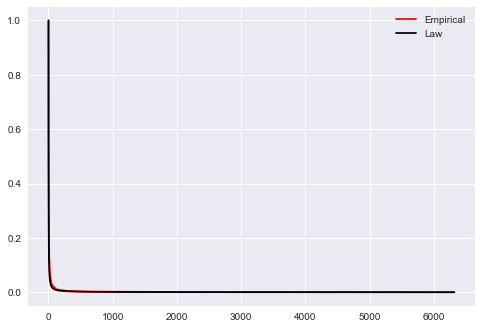

In [5]:
plt.plot(np.arange(1, len(values)+1), empiric_prob, 'r-', label="Empirical")
plt.plot(np.arange(1, len(values)+1), law_prob, 'k-', label="Law")
plt.legend()

On the one hand graphs are similar, but on the other hand most of values are too small to compare, so let's plot it in log-scale:

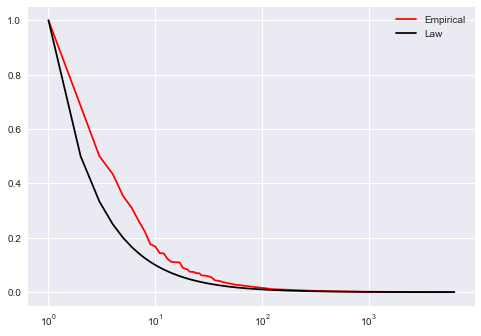

In [6]:
plt.semilogx(np.arange(1, len(values)+1), empiric_prob, 'r-', label="Empirical")
plt.semilogx(np.arange(1, len(values)+1), law_prob, 'k-', label="Law")
plt.legend()

It is easy to see that results are similar but not enough

In [7]:
values.sort()

There are some convenient functions, for example for plotting pdf, cdf and log-log-scale graph

In [8]:
def get_bincenters(degrees, bins):
    yh0, binEdges=np.histogram(degrees, bins=bins)
    bincenters0 = 0.5*(binEdges[1:]+binEdges[:-1])
    return bincenters0, yh0

In [9]:
def plot_pdf(bincenters0, yh0):
    plt.plot(bincenters0, yh0, '-', lw=2)
    plt.ylabel('count')
    plt.xlabel('x')
    return 

In [10]:
def plot_cdf(degrees):
    degrees = sorted(degrees)
    cdf, degree, cur_sum, i, max_val = [], 0, 0, 0, sum(degrees)
    while i < len(degrees):
        if degree > degrees[i]:
            while degree > degrees[i]:
                cur_sum += degrees[i]
                i += 1
                if i == len(degrees):
                    break
        degree += 1
        cdf.append(cur_sum / max_val)
    plt.plot(np.arange(0, max(degrees)+1), cdf[:-1], '-', lw=2)
    plt.ylabel('count')
    plt.xlabel('x')
    return

In [11]:
def plot_loglog(bincenters0, yh0):
    plt.loglog(bincenters0, yh0, '.', lw=2)
    plt.ylabel('count')
    plt.xlabel('x')
    return

In [12]:
len(set(values))

4008

In [13]:
def find_alpha(degrees, xmin):
    sum_degree = sum([np.log(xi/xmin) if xi > xmin else 0 for xi in degrees])
    alpha = 1 + len(degrees) * sum_degree ** (-1)
    return alpha

def find_sigma(alpha, n):
    return (alpha - 1)/(n)**(1/2)

PDF for graph:

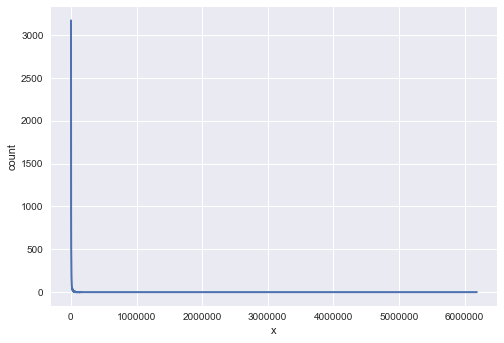

In [14]:
hist0 = get_bincenters(values, 4008)
plot_pdf(hist0[0], hist0[1])

CDF for graph:

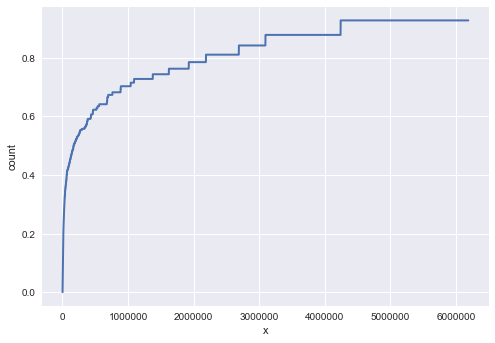

In [15]:
plot_cdf(values)

##### Assuming that the data is distributed according to the Power Law, find $\alpha$ of the distribution mean sample variance $\sigma^2$

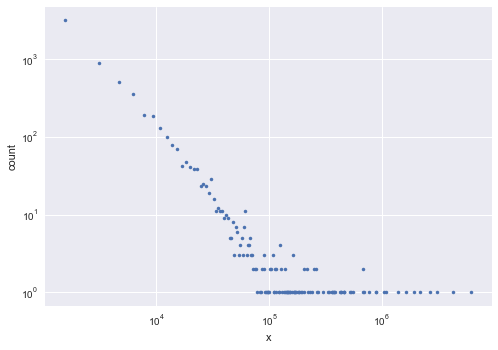

In [16]:
ans = plot_loglog(hist0[0], hist0[1])

from the graph it is supposed, that xmin can be taken as the smallest degree from dataset, then alpha and sigma are:

In [17]:
alpha = find_alpha(values, values[0])
sigma = find_sigma(alpha, len(values))
alpha, sigma

(1.7194176300571247, 0.0090508895608046123)

minimum, maximum, average and median values:

In [18]:
min(values), max(values), np.mean(values), np.median(values)

(800, 6187267, 13566.670781893004, 2335.0)

# Task 2

In [19]:
edges1 = np.loadtxt("network.txt", skiprows=4, dtype="i8,i8")
edges2 = np.loadtxt("web_Stanford.txt", skiprows=4, dtype="i8,i8")
G1 = nx.Graph()
G2 = nx.Graph()

In [20]:
G1.add_edges_from(edges1)
G2.add_edges_from(edges2)

maximum and average values of degrees in first and second graph:

In [21]:
degrees1 = list(nx.degree(G1))
degrees2 = list(nx.degree(G2))
max(degrees1), np.mean(degrees1), max(degrees2), np.mean(degrees2)

(22963, 11482.0, 281903, 140952.0)

number of vertices in graphs:

In [22]:
len(degrees1), len(degrees2)

(22963, 281903)

number of different degrees in graphs:

In [23]:
len(set(degrees1)), len(set(degrees2))

(22963, 281903)

oops, every number of degrees is met only once

In [24]:
hist1 = get_bincenters(degrees1, 100)
hist2 = get_bincenters(degrees2, 1000)

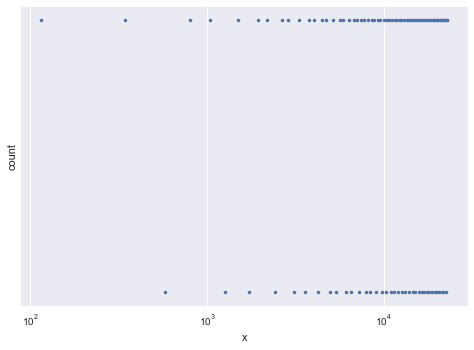

In [25]:
plot_loglog(hist1[0], hist1[1])

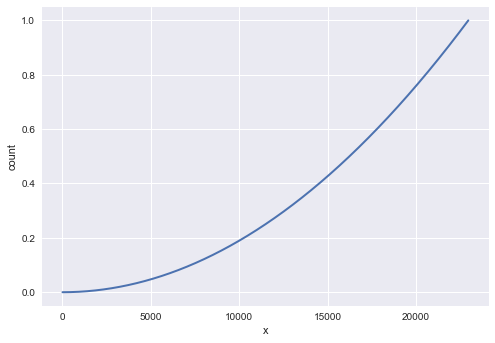

In [26]:
plot_cdf(degrees1)

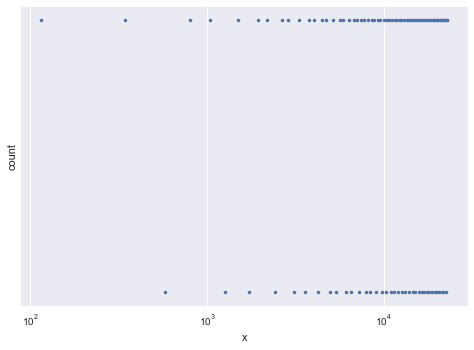

In [27]:
plot_loglog(hist1[0], hist1[1])

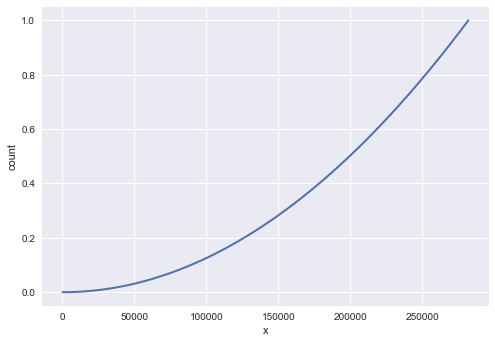

In [28]:
plot_cdf(degrees2)

It doesnt look like graphs could be fit with power law

In [29]:
g1_path = nx.average_shortest_path_length(G1)

In [30]:
g1_trans = nx.transitivity(G1)

In [31]:
r_p = np.mean(degrees1)/len(degrees1)
G1_new = nx.fast_gnp_random_graph(len(degrees1), r_p)

MemoryError: 

And here i have memory limit with graph generation

In [ ]:
g1_new_path = nx.average_shortest_path_length(G1_new)

In [ ]:
g1_new_trans = nx.transitivity(G1_new)